In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings("ignore")

In [85]:
df = pd.read_csv("HousingData.csv")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [87]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [88]:
missing_values = df.isnull().sum()
print("Missing values per column :\n", missing_values)

Missing values per column :
 CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


In [89]:
df.fillna(df.mean(), inplace = True)
missing_values = df.isnull().sum()
print("Missing values per column :\n", missing_values)

Missing values per column :
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


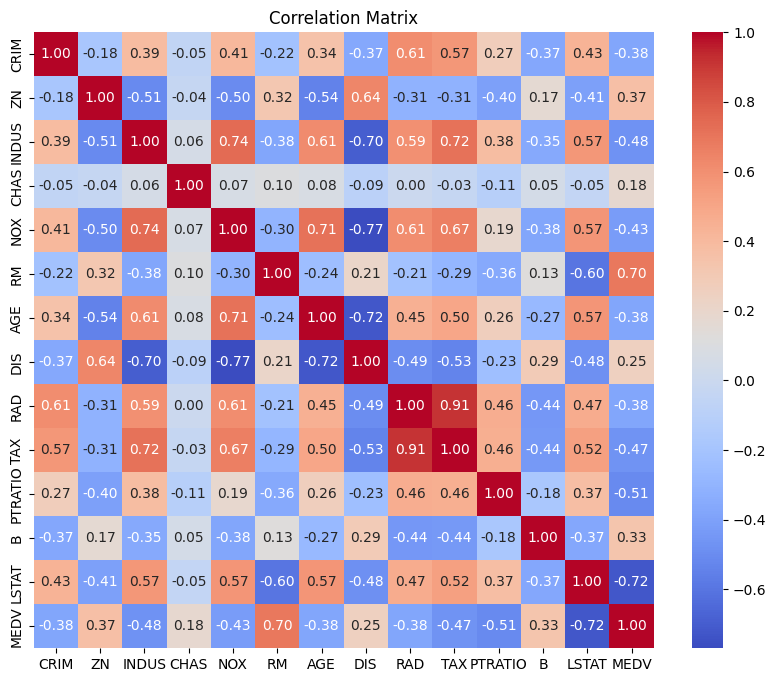

In [90]:
correlation_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm", fmt =".2f")
plt.title("Correlation Matrix")
plt.show()

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [92]:
selected_features = ['RM','LSTAT','PTRATIO']
X = df[selected_features]
Y = df['MEDV']

In [93]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
ML_model = LinearRegression()
ML_model.fit(X_train,Y_train)

LinearRegression()

In [94]:
Y_pred = ML_model.predict(X_test)

In [95]:
mae = mean_absolute_error(Y_test,Y_pred)
mse = mean_squared_error(Y_test,Y_pred)
r2 = r2_score(Y_test,Y_pred)

print("Mean Absolute Error(MAE) = ",mae)
print("Mean Squared Error(MSE) = ",mse)
print("R2 Score = ",r2)

Mean Absolute Error(MAE) =  3.346587828403546
Mean Squared Error(MSE) =  27.533016964657918
R2 Score =  0.6245520716630015


In [96]:
df['PRICE'] = ML_model.predict(df[selected_features])
print(df.head()) 

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B      LSTAT  MEDV      PRICE  
0  396.90   4.980000  24.0  30.883298  
1  396.90   9.140000  21.6  25.615846  
2  392.83   4.030000  34.7  32.368924  
3  394.63   2.940000  33.4  31.186223  
4  396.90  12.715432  36.2  26.673984  


In [128]:
comparison_df = pd.DataFrame({
    "Original Price" : df['MEDV'],
    "Predicted Price" : df['PRICE']
})
comparison_df

,Original Price,Predicted Price
0,24.0,30.883298
1,21.6,25.615846
2,34.7,32.368924
3,33.4,31.186223
4,36.2,26.673984
...,...,...
501,22.4,21.746850
502,20.6,21.245269
503,23.9,27.574836
504,22.0,26.170296


In [129]:
x = df.drop(columns=['MEDV','PRICE'])
y = df['MEDV']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print("Training set shape: ",x_train.shape)
print("Testing set shape: ",x_test.shape)

Training set shape:  (404, 13)
Testing set shape:  (102, 13)


In [130]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [173]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(13,)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(50, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

In [174]:
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                     │ (None, 100)                 │           1,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,901 (26.96 KB)

 Trainable params: 6,701 (26.18 KB)

 Non-trainable params: 200 (800.00 B)

In [175]:
history = model.fit(x_train,y_train, batch_size=32, epochs = 20 , validation_data=(x_test,y_test))

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 553.0891 - mae: 21.3983 - val_loss: 250.9432 - val_mae: 12.5372
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 470.6082 - mae: 19.5546 - val_loss: 306.7903 - val_mae: 13.5301
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 399.8672 - mae: 17.4226 - val_loss: 390.9480 - val_mae: 15.4582
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 323.8151 - mae: 15.1074 - val_loss: 409.0378 - val_mae: 16.2061
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 232.4269 - mae: 12.3215 - val_loss: 343.9396 - val_mae: 15.1547
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 162.2258 - mae: 9.7430 - val_loss: 244.8013 - val_mae: 13.0544
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 130.5690 - mae: 8.4720 - val_loss: 145.0283 - val_mae: 9.9967
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 115.3557 - mae: 8.0235 - val_loss: 82.5234 - val_mae: 7.2239
Epoch 9/20
13/13 ━━━━━

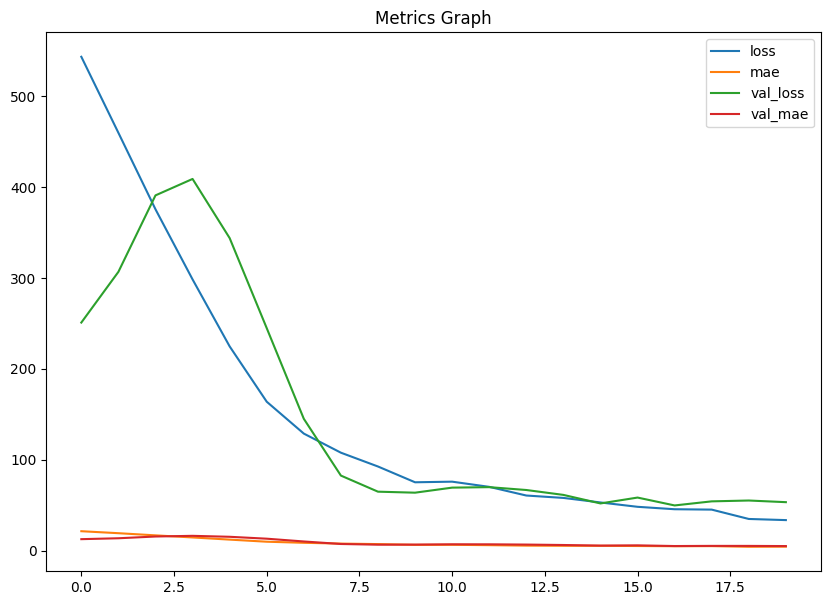

In [176]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.title("Metrics Graph")
plt.show()

In [177]:
y_pred = model.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [178]:
y_pred = y_pred.flatten()

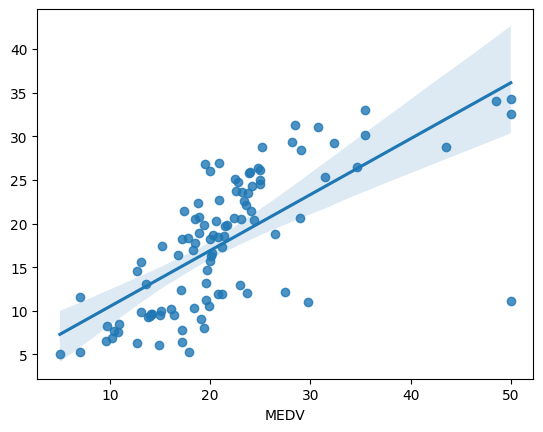

In [179]:
sns.regplot(x=y_test, y=y_pred)
plt.show()

In [180]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print("Mean Absolute Error(MAE) = ",mae)
print("Mean Squared Error(MSE) = ",mse)
print("R2 Score = ",r2)

Mean Absolute Error(MAE) =  4.930763076333439
Mean Squared Error(MSE) =  53.25801218645525
R2 Score =  0.27375883404212065


In [181]:
dl_comparison = pd.DataFrame({
    "Original" : y_test,
    "Predicted" : y_pred
})
print(dl_comparison.head(10))

     Original  Predicted
173      23.6  22.093925
274      32.4  29.207872
491      13.6  13.081234
72       22.8  24.818277
452      16.1  10.161803
76       20.0  15.749063
316      17.8  18.357021
140      14.0   9.423722
471      19.6  11.247286
500      16.8  16.422506


In [182]:
df['PRICEDL'] = model.predict(x)
print(df.head()) 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B      LSTAT  MEDV      PRICE    PRICEDL  
0  396.90   4.980000  24.0  30.883298  25.893888  
1  396.90   9.140000  21.6  25.615846  24.690430  
2  392.83   4.030000  34.7  32.368924  26.455267  
3  394.63   2.940000  33.4  31.186223  29.132282  
4  396.90  12.715432  36.2  26.673984  26.919014  


In [183]:
comparison_df = pd.DataFrame({
    "Original Price" : df['MEDV'],
    "Predicted Price" : df['PRICE']
})
print(comparison_df)

     Original Price  Predicted Price
0              24.0        30.883298
1              21.6        25.615846
2              34.7        32.368924
3              33.4        31.186223
4              36.2        26.673984
..              ...              ...
501            22.4        21.746850
502            20.6        21.245269
503            23.9        27.574836
504            22.0        26.170296
505            11.9        21.424880

[506 rows x 2 columns]


In [184]:
comparison_dl = pd.DataFrame({
    "Original Price" : df['MEDV'],
    "Predicted Price" : df['PRICEDL']
})
print(comparison_dl)

     Original Price  Predicted Price
0              24.0        25.893888
1              21.6        24.690430
2              34.7        26.455267
3              33.4        29.132282
4              36.2        26.919014
..              ...              ...
501            22.4        20.677860
502            20.6        21.421888
503            23.9        22.684679
504            22.0        22.113684
505            11.9        21.980915

[506 rows x 2 columns]
